# Electricity Bill Prediction

## Problem Statement

The Problem Statement for Electricity Bill Prediction is to estimate the monthly electricity bill for a given company based on its power consumption details. The dataset contains 45,345 rows of records for different companies power consumption of various appliances such as fans, air conditioners, monitors, refrigerators, and televisions.

Given the power consumption details of these appliances, the goal is to develop a machine learning model that can predict the monthly electricity bill for a company. The model should be able to take into account the power consumption of each appliance and accurately estimate the electricity cost.

By utilizing this dataset and building an accurate prediction model, the aim is to provide companies with a tool to estimate their electricity bills in advance, allowing them to plan their energy usage and budget effectively.

## Features

1) Fan : It represents the number of fans running in the company.

2) Monitor: It represents the number of monitors running in the company.

3) Air Conditioners: It represents the number of air conditioners running in the company.

4) Television: It represents the number of televisions running in the company.

5) Refrigerator: It represents the number of refrigerators running in the company.

6) Month: It indicates the month for which the power consumption data is recorded in the company.

7) City: It provides information about the geographical location of the company.

8) Company: It identifies the name of the company associated with the electricity bill.

9) Number of units consumed per day: It is the total power consumption in units for all appliances in the company on a daily basis.

10) Number of units consumed per month: It is the total power consumption in units for all appliances in the company for the entire month. It is calculated by multiplying the "Number of units consumed per day" by the number of days in a month.

11) Electricity Bill: It represents the monthly electricity bill amount in INR (Indian Rupees) for the company. It is the target variable that we want to predict using the given features.


### Step-1 Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step-2 Load the Dataset

In [2]:
df= pd.read_csv('Electricity_Monthly_Bill.csv')

In [3]:
df.head() ## Its shows the Top 5 records.

,Fan,Monitor,AirConditioner,Television,Refrigerator,Month,City,Company,Number of units consumed per day,Number of units consumed per month,ElectricityBill
0,16,23,2,6,1,10,Hyderabad,Tata Power Company Ltd.,60.48,1814.4,15240.96
1,19,22,2,3,1,5,Vadodara,NHPC,62.32,1869.6,14582.88
2,7,20,2,6,7,7,Shimla,Jyoti Structure,69.60,2088.0,16077.60
3,7,22,3,21,1,6,Mumbai,Power Grid Corp,66.32,1989.6,18304.32
4,11,23,2,11,1,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),56.48,1694.4,15588.48


In [4]:
df.shape ## Its gives the information about the rows and columns in dataset 

(45345, 11)

In [5]:
df.info() ## Its specifies Particular informtion about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Fan                                 45345 non-null  int64  
 1   Monitor                             45345 non-null  int64  
 2   AirConditioner                      45345 non-null  int64  
 3   Television                          45345 non-null  int64  
 4   Refrigerator                        45345 non-null  int64  
 5   Month                               45345 non-null  int64  
 6   City                                45345 non-null  object 
 7   Company                             45345 non-null  object 
 8   Number of units consumed per day    45345 non-null  float64
 9   Number of units consumed per month  45345 non-null  float64
 10  ElectricityBill                     45345 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fan,45345.0,13.990694,5.470816,5.00,9.00,14.00,19.00,23.00
Monitor,45345.0,21.705458,1.672575,17.00,22.00,22.00,23.00,23.00
AirConditioner,45345.0,1.503959,1.115482,0.00,1.00,2.00,2.00,3.00
Television,45345.0,12.502635,5.756007,3.00,7.00,13.00,17.00,22.00
Refrigerator,45345.0,2.865057,3.894933,1.00,1.00,1.00,1.00,12.00
Month,45345.0,6.488058,3.443252,1.00,3.00,6.00,9.00,12.00
Number of units consumed per day,45345.0,61.103483,20.660103,20.32,46.08,58.88,72.88,126.08
Number of units consumed per month,45345.0,1833.104492,619.803092,609.60,1382.40,1766.40,2186.40,3782.40
ElectricityBill,45345.0,15343.613280,5310.986282,4632.96,11493.12,14696.64,18348.48,34841.52


### step-3 EDA (Exploratory Data Analysis)

#### 3.1 Checking for null values

In [7]:
df.isnull().sum()

Fan                                   0
Monitor                               0
AirConditioner                        0
Television                            0
Refrigerator                          0
Month                                 0
City                                  0
Company                               0
Number of units consumed per day      0
Number of units consumed per month    0
ElectricityBill                       0
dtype: int64

In this dataset, there are no null values present, so there is no need to treat or handle null values.

### Step-4 Feature Engineering and Data Visualization

In [8]:
correlation= df.corr()

<AxesSubplot:>

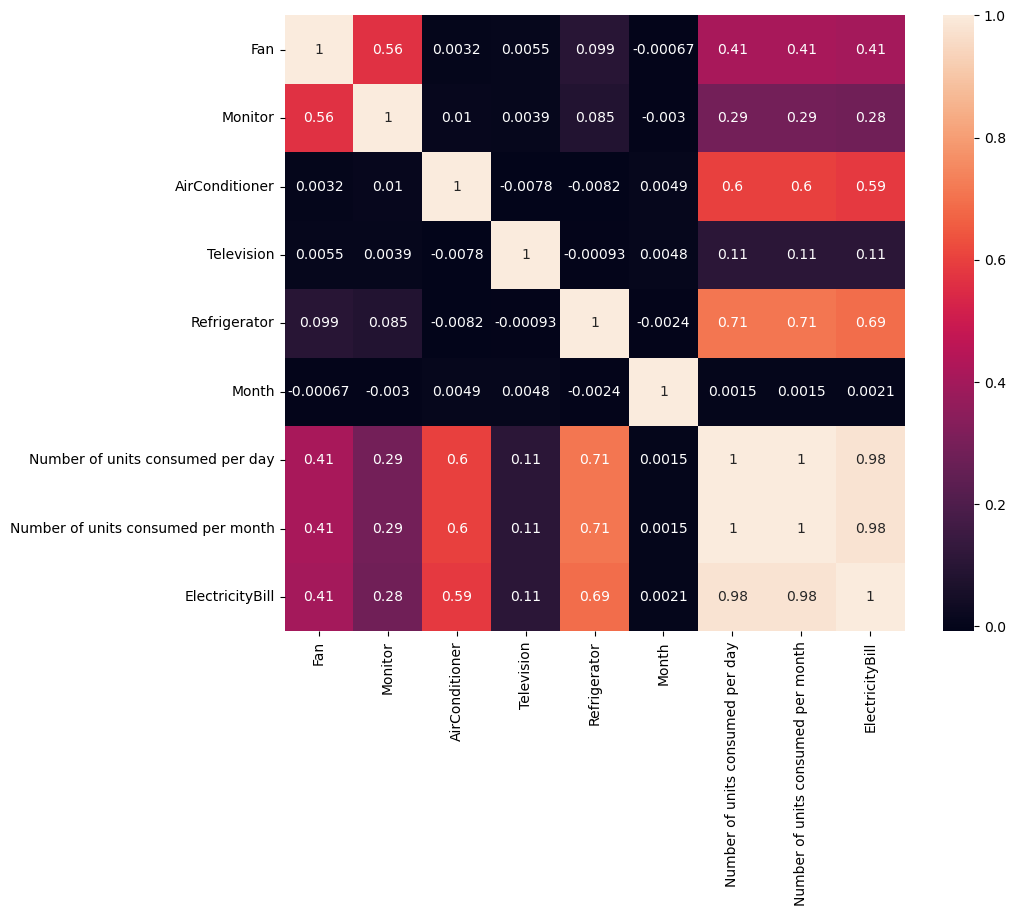

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)

In [10]:
df.drop(['Number of units consumed per day'],axis=1,inplace=True)

In [11]:
df.corr()['ElectricityBill']

Fan                                   0.405294
Monitor                               0.282862
AirConditioner                        0.585899
Television                            0.107029
Refrigerator                          0.692232
Month                                 0.002134
Number of units consumed per month    0.977647
ElectricityBill                       1.000000
Name: ElectricityBill, dtype: float64

<AxesSubplot:xlabel='ElectricityBill', ylabel='Density'>

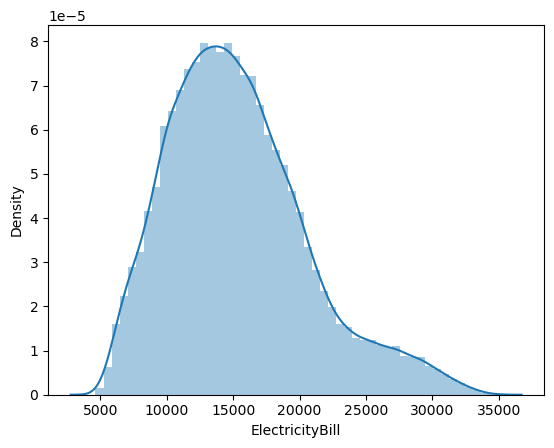

In [12]:
sns.distplot(df['ElectricityBill'])

#### The Above the distrubtion we conculde that there is an Right Skewed distrubtion in the Target Variable

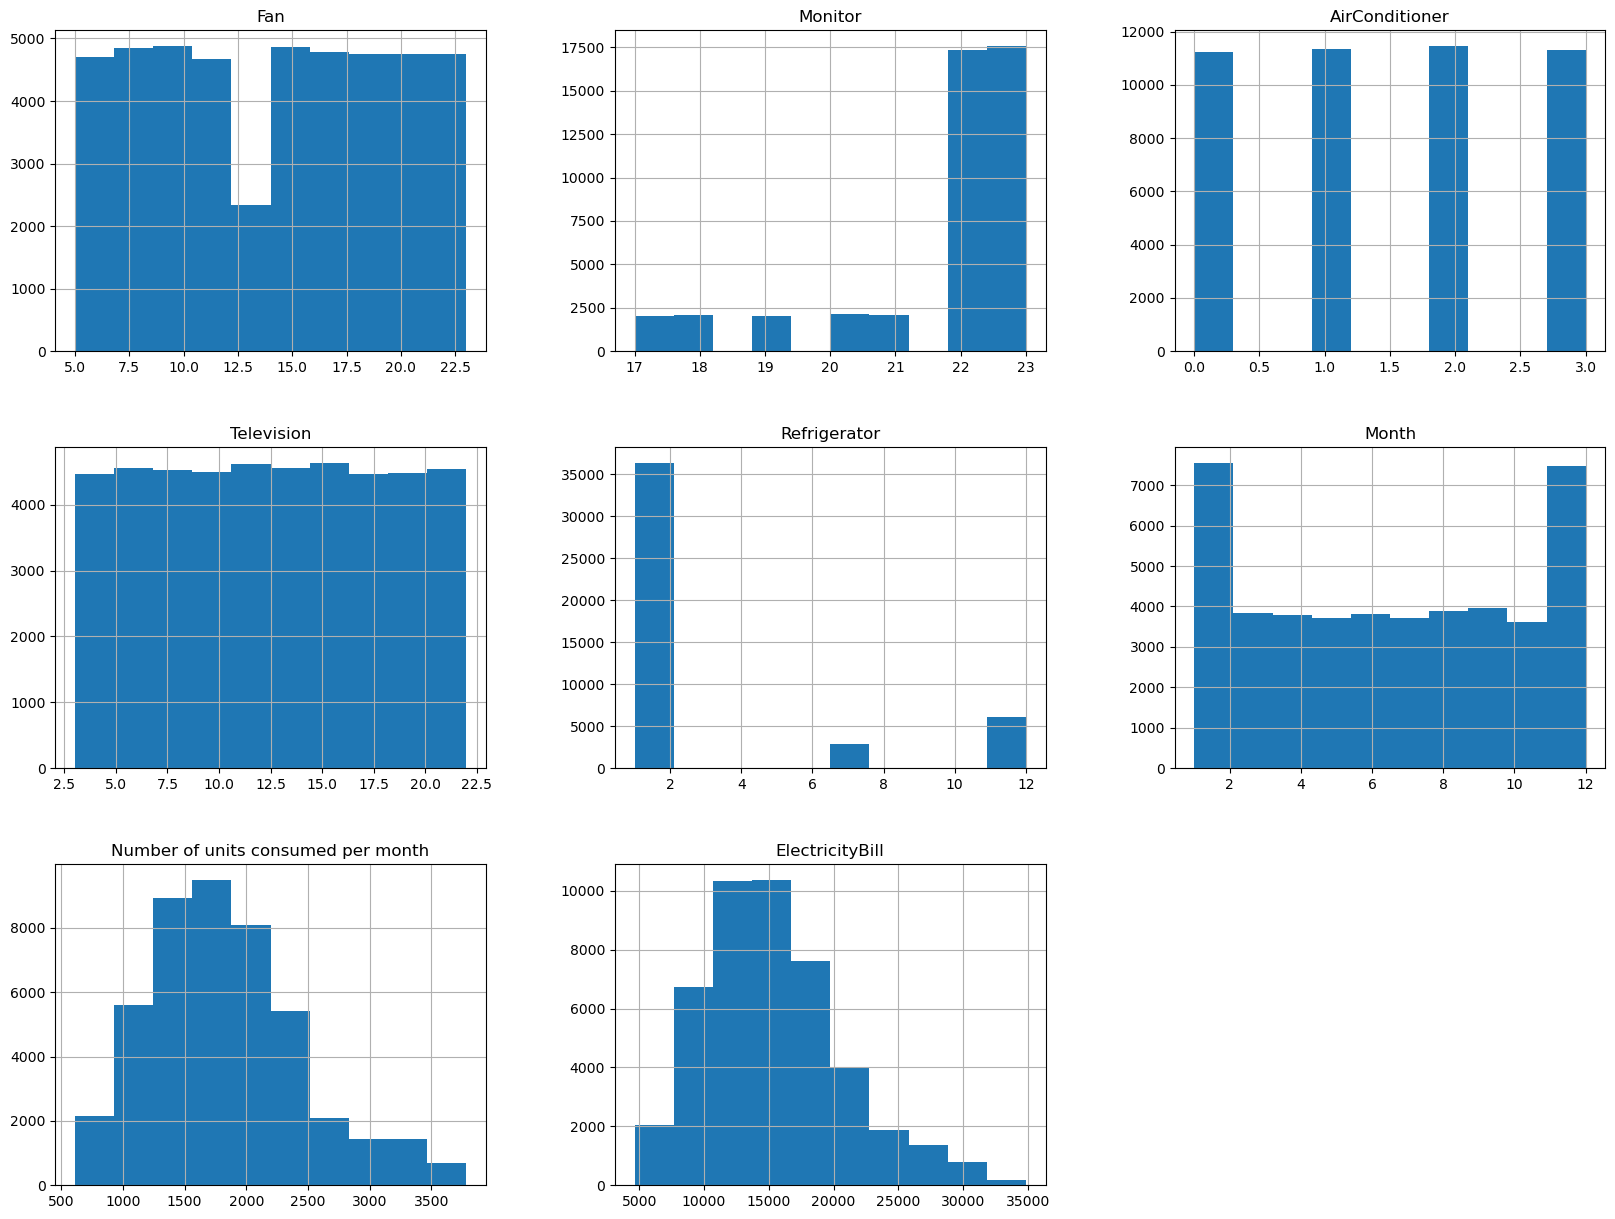

In [13]:
df.hist(figsize=(20,15));

In [14]:
df['Company'].value_counts()

Ringfeder Power Transmission India Pvt. Ltd.                          1486
JSW Energy Ltd.                                                       1477
Guj Ind Power                                                         1476
SJVN Ltd.                                                             1471
Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.    1470
NTPC Pvt. Ltd.                                                        1466
Optibelt Power Transmission India Private Limited                     1463
Kalpataru Power                                                       1456
GE T&D India Limited                                                  1453
KEC International                                                     1442
Reliance Power                                                        1441
Orient Green                                                          1427
Torrent Power Ltd.                                                    1426
L&T Transmission & Distri

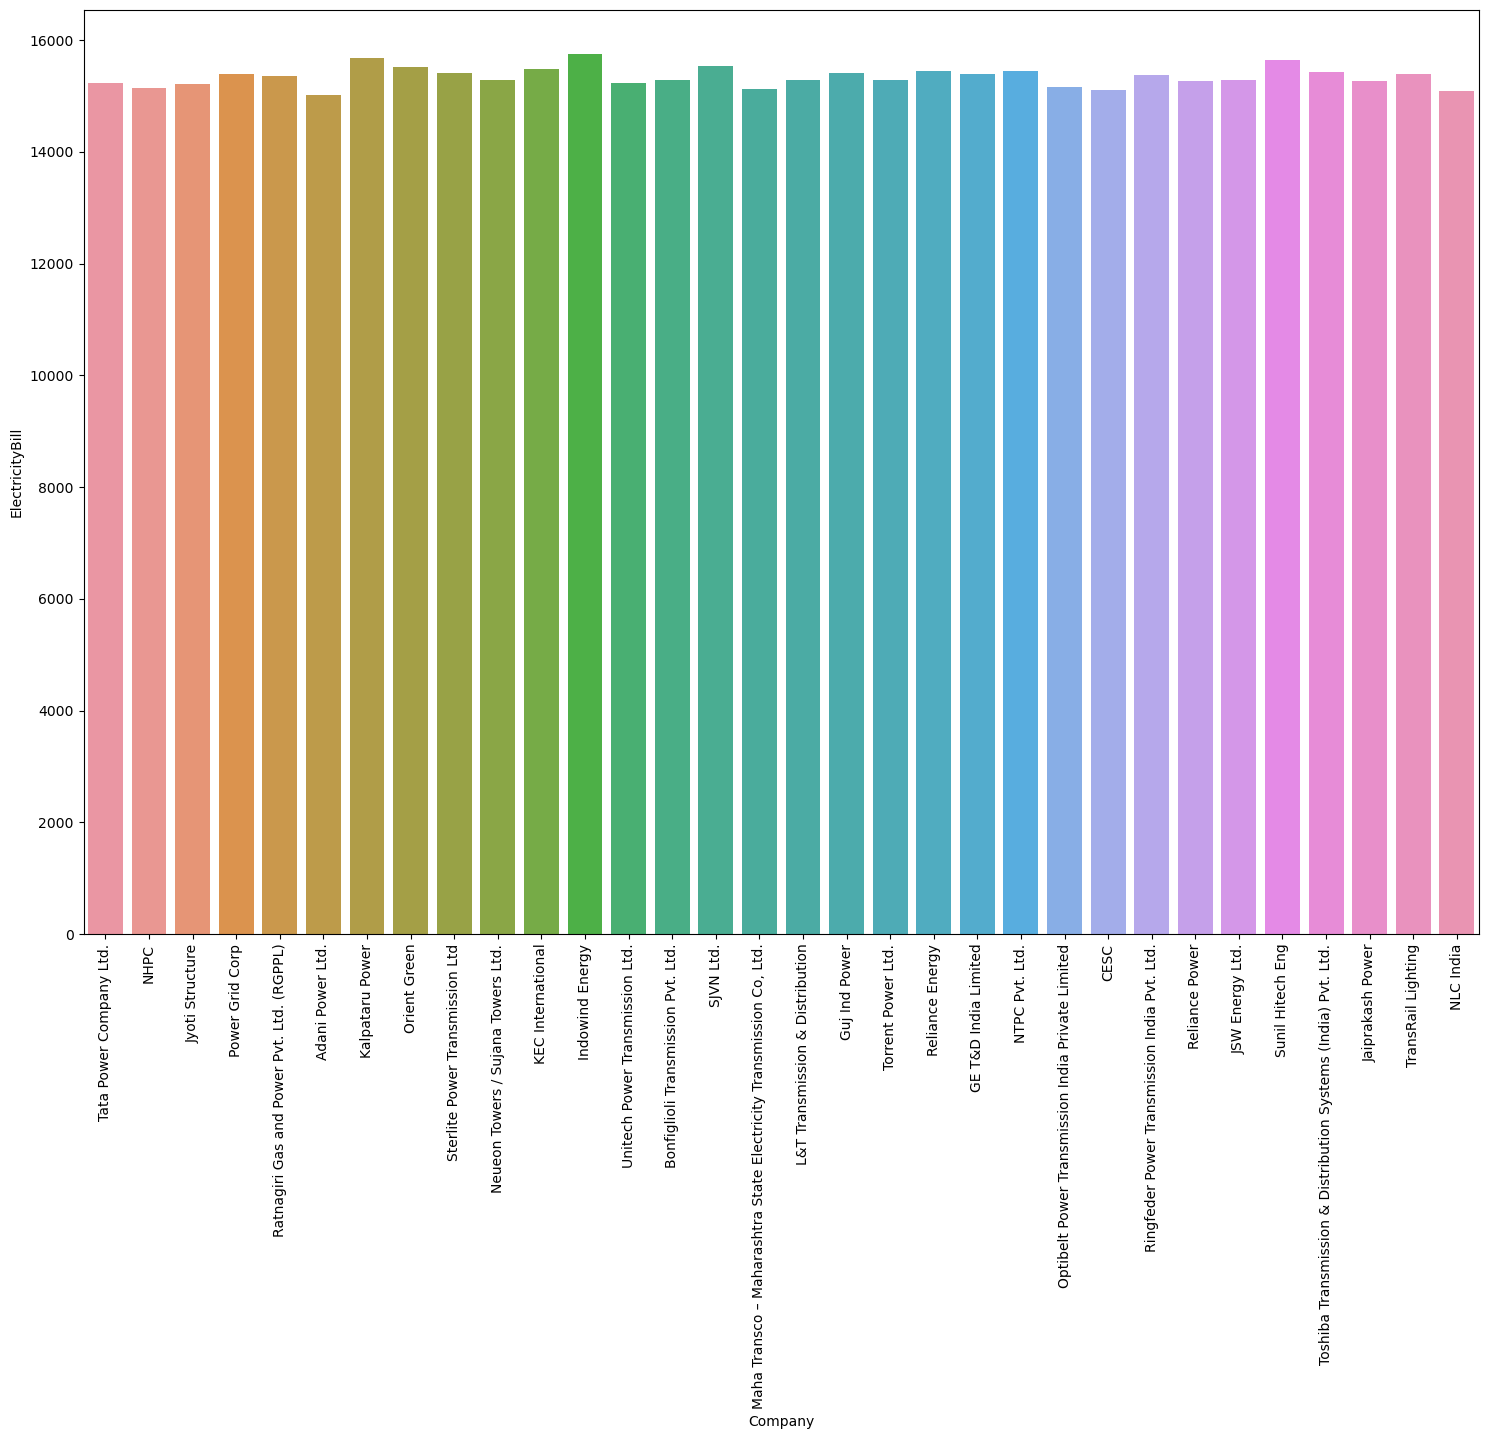

In [15]:
plt.figure(figsize=(18,12))
sns.barplot(x='Company',y='ElectricityBill',data=df,ci=None)
plt.xticks(rotation=90);

If the above plot represents companies plotted against their electricity bills, it indicates that the majority of companies have similar or nearly equal payment amounts, with only slight variations.

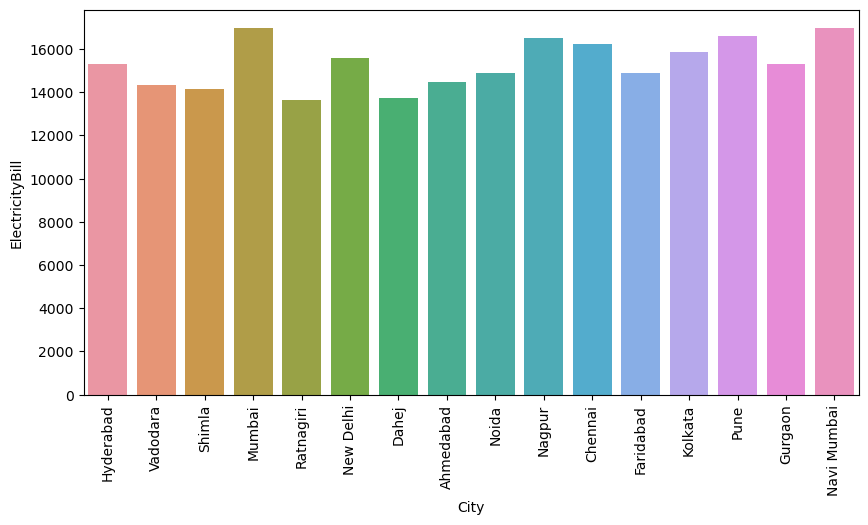

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x='City',y='ElectricityBill',data=df,ci=None)
plt.xticks(rotation=90);


If the above plot represents city-wise electricity bills, it indicates that Mumbai has significantly higher bills compared to Chennai, Nagpur, New Delhi, and Pune, which also have relatively high bills with some slight differences. These cities, renowned for housing MNCs and IT companies, exhibit comparatively higher electricity expenses.

<AxesSubplot:xlabel='Month', ylabel='ElectricityBill'>

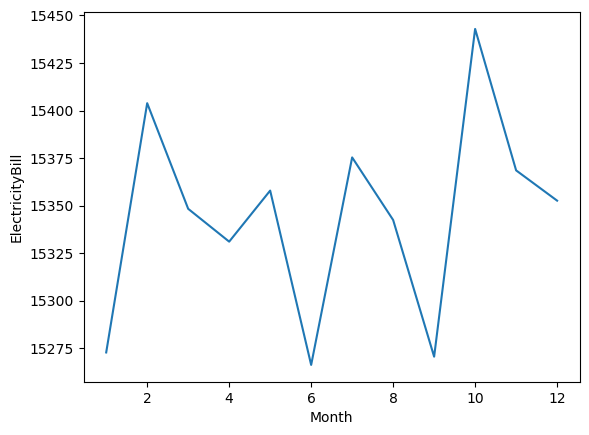

In [17]:
sns.lineplot(x='Month',y='ElectricityBill',data=df,ci=None)

When examining the month-wise electricity bills, it is evident that the bills fluctuate, showing no linear relationship between them.

<AxesSubplot:xlabel='Fan', ylabel='ElectricityBill'>

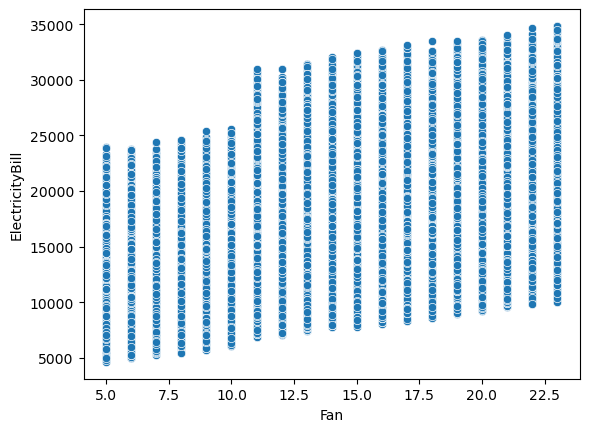

In [18]:
sns.scatterplot(x='Fan',y='ElectricityBill',data=df)

If the number of fan count increases, and correspondingly, the electricity bill also increases, it indicates a linear relationship between the two variables.

<AxesSubplot:xlabel='Monitor', ylabel='ElectricityBill'>

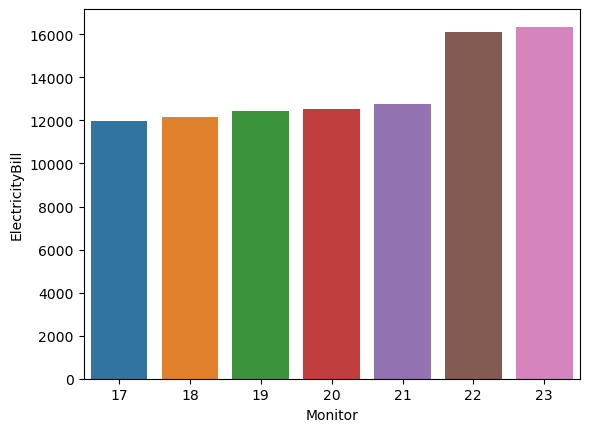

In [19]:
sns.barplot(x='Monitor',y='ElectricityBill',data=df,ci=None)

If the number of monitor count increases, and as a result, the electricity bill also increases, it suggests a linear relationship between the two variables.

<AxesSubplot:xlabel='Television', ylabel='ElectricityBill'>

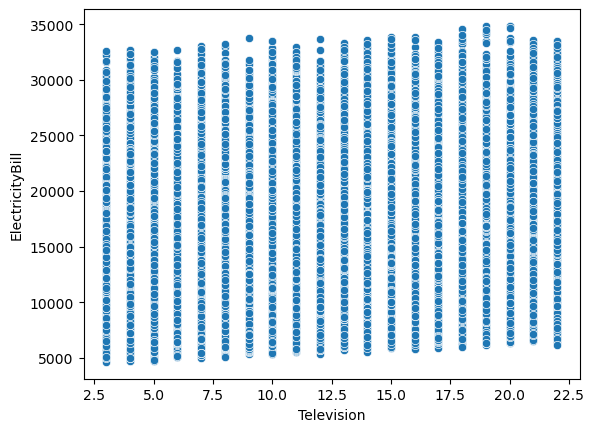

In [20]:
 sns.scatterplot(x='Television',y='ElectricityBill',data=df)

If the number of television count increases, and as a result, the electricity bill also increases, it suggests a linear relationship between the two variables.

<AxesSubplot:xlabel='AirConditioner', ylabel='ElectricityBill'>

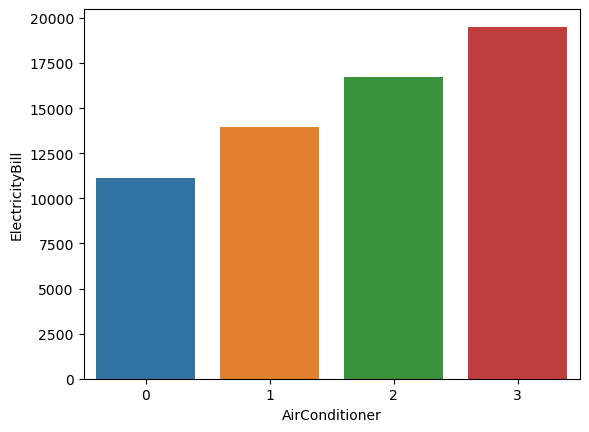

In [21]:
sns.barplot(x='AirConditioner',y='ElectricityBill',data=df,ci=None)

Upon examining the plot, it is evident that when considering the number of air conditioners, the electricity bill is highest for the scenario where there are three air conditioners. This observation suggests that an increase in the count of air conditioners leads to a corresponding increase in the electricity bill.

<AxesSubplot:xlabel='Refrigerator', ylabel='ElectricityBill'>

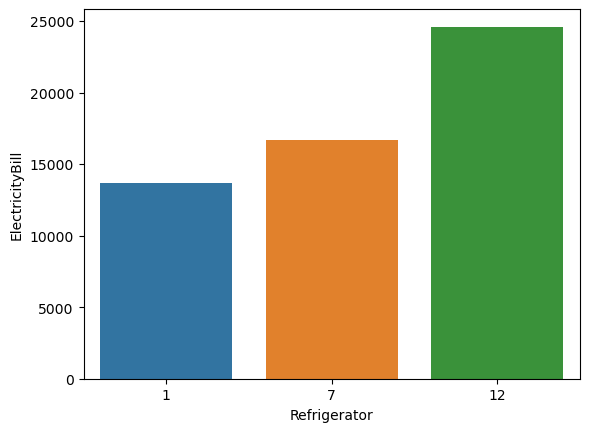

In [22]:
sns.barplot(x='Refrigerator',y='ElectricityBill',data=df,ci=None)

Upon examining the plot, it is evident that when considering the number of refrigerators, the electricity bill is highest for the scenario where there are 12 refrigerators. This observation suggests that an increase in the count of refrigerators leads to a corresponding increase in the electricity bill.

<AxesSubplot:xlabel='Number of units consumed per month', ylabel='ElectricityBill'>

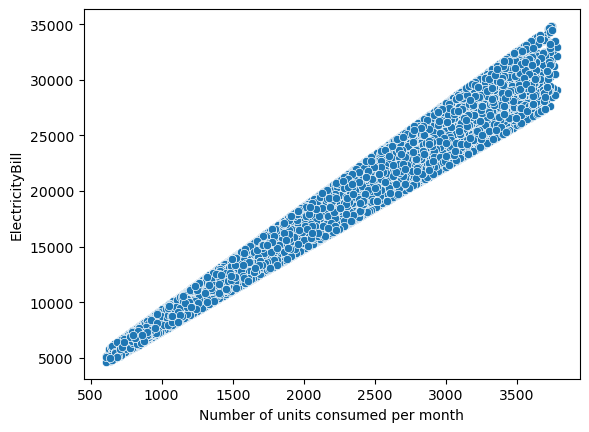

In [23]:
sns.scatterplot(x='Number of units consumed per month',y='ElectricityBill',data=df)

In the above plot, it demonstrates a perfect linear relationship between the variables. The power consumed per month increases as the electricity bill increases, and the plot appears to exhibit the best fit line of a linear regression.

In [24]:
df['Total Appliances'] = df[['Fan', 'Monitor', 'AirConditioner', 'Television', 'Refrigerator']].sum(axis=1)

In [25]:
df.head()

,Fan,Monitor,AirConditioner,Television,Refrigerator,Month,City,Company,Number of units consumed per month,ElectricityBill,Total Appliances
0,16,23,2,6,1,10,Hyderabad,Tata Power Company Ltd.,1814.4,15240.96,48
1,19,22,2,3,1,5,Vadodara,NHPC,1869.6,14582.88,47
2,7,20,2,6,7,7,Shimla,Jyoti Structure,2088.0,16077.60,42
3,7,22,3,21,1,6,Mumbai,Power Grid Corp,1989.6,18304.32,54
4,11,23,2,11,1,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),1694.4,15588.48,48


If feature extraction is applied, by including the total number of appliances in the company, it calculates the total power consumed by all the appliances in the company.

<AxesSubplot:xlabel='Total Appliances', ylabel='ElectricityBill'>

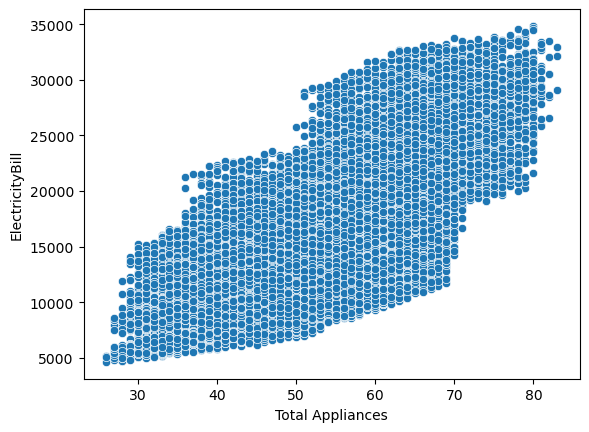

In [26]:
sns.scatterplot(x='Total Appliances',y='ElectricityBill',data=df)

In [27]:
df['Electricity Cost per Unit'] = df['ElectricityBill'] / df['Number of units consumed per month']

In [28]:
df.head()

,Fan,Monitor,AirConditioner,Television,Refrigerator,Month,City,Company,Number of units consumed per month,ElectricityBill,Total Appliances,Electricity Cost per Unit
0,16,23,2,6,1,10,Hyderabad,Tata Power Company Ltd.,1814.4,15240.96,48,8.4
1,19,22,2,3,1,5,Vadodara,NHPC,1869.6,14582.88,47,7.8
2,7,20,2,6,7,7,Shimla,Jyoti Structure,2088.0,16077.60,42,7.7
3,7,22,3,21,1,6,Mumbai,Power Grid Corp,1989.6,18304.32,54,9.2
4,11,23,2,11,1,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),1694.4,15588.48,48,9.2


If feature extraction is applied, by including the electricity cost per unit, it calculates the cost per unit of electricity for both the city and the company. The electricity bill varies depending on the load supply.

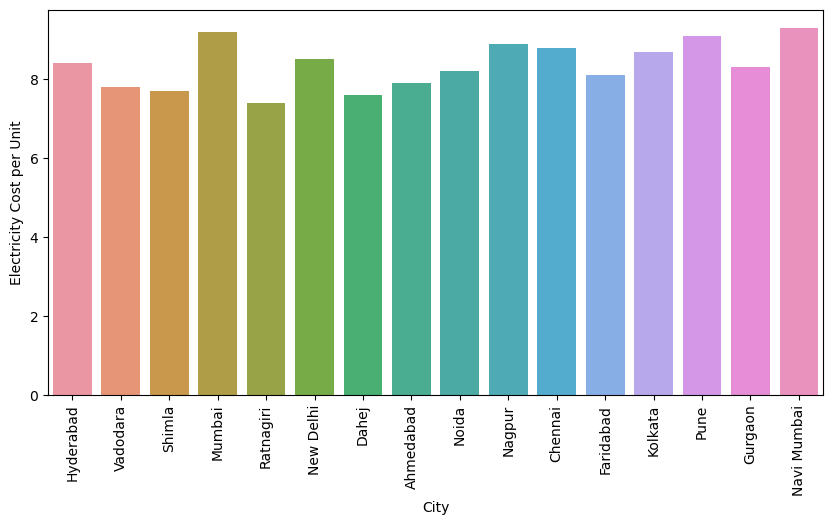

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='City',y='Electricity Cost per Unit',data=df,ci=None)
plt.xticks(rotation=90);

In the above plot, it displays the electricity cost per unit plotted against different cities. The plot indicates that Mumbai has the highest tariff rate, while Chennai, Pune, and Nagpur have the second-highest tariff rates. Therefore, the tariff rate appears to be dependent on the city and the load supply.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Fan                                 45345 non-null  int64  
 1   Monitor                             45345 non-null  int64  
 2   AirConditioner                      45345 non-null  int64  
 3   Television                          45345 non-null  int64  
 4   Refrigerator                        45345 non-null  int64  
 5   Month                               45345 non-null  int64  
 6   City                                45345 non-null  object 
 7   Company                             45345 non-null  object 
 8   Number of units consumed per month  45345 non-null  float64
 9   ElectricityBill                     45345 non-null  float64
 10  Total Appliances                    45345 non-null  int64  
 11  Electricity Cost per Unit           45345

### Outlier Treatment

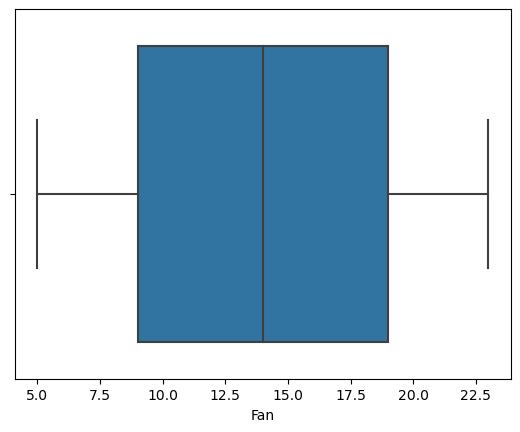

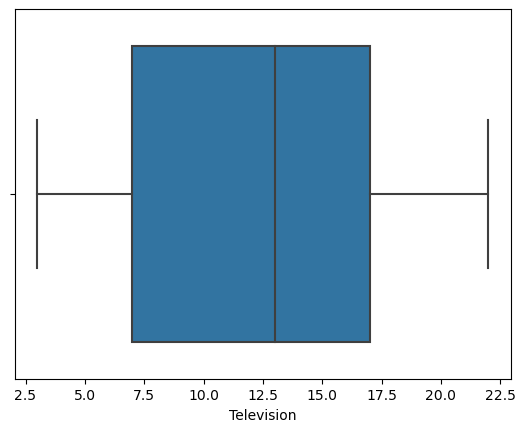

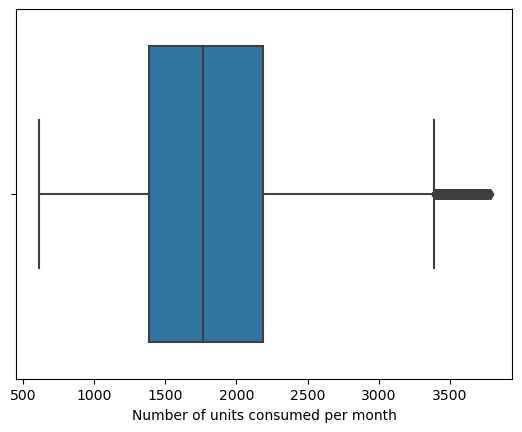

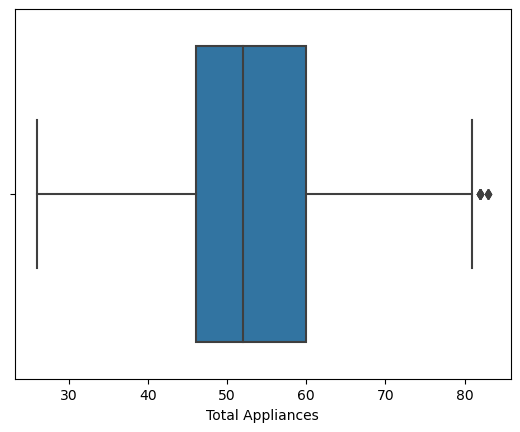

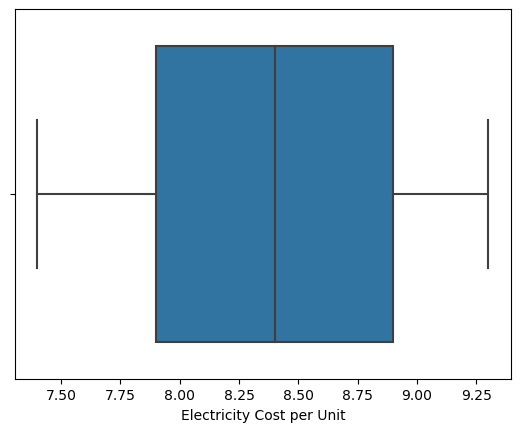

In [31]:
column_names = ['Fan','Television','Number of units consumed per month','Total Appliances','Electricity Cost per Unit']
for i in column_names:
    sns.boxplot(df[i],data=df);
    plt.show();

In [32]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [33]:
#treating all the outliers at once
for column in column_names:
        lr,ur=remove_outliers(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

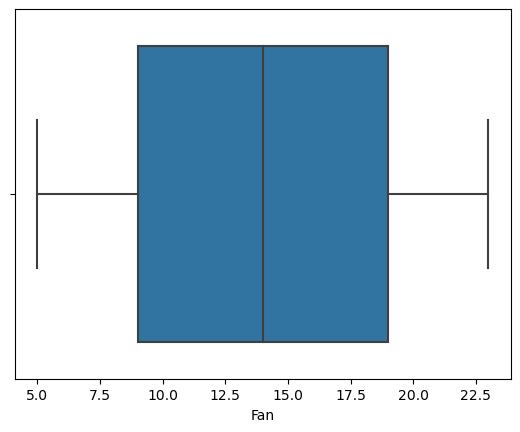

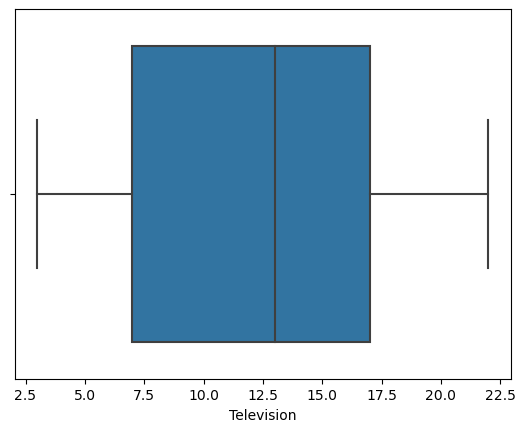

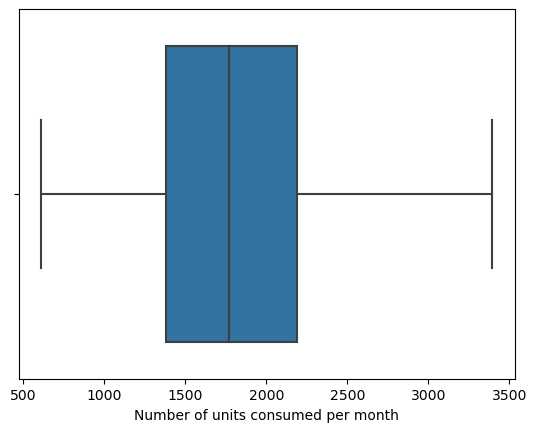

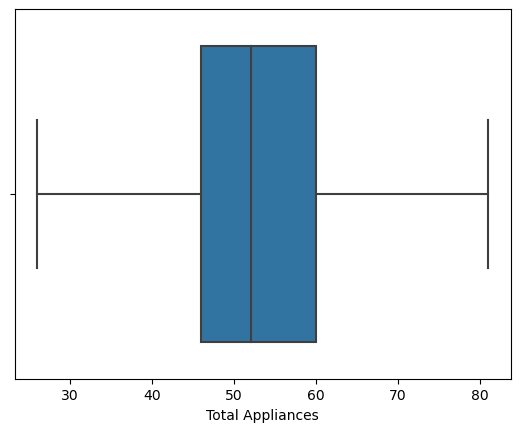

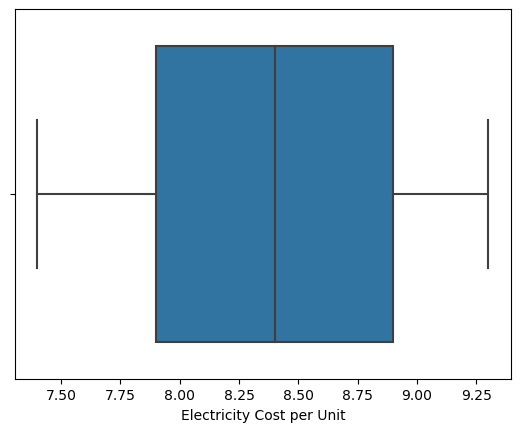

In [34]:
column_names = ['Fan','Television','Number of units consumed per month','Total Appliances','Electricity Cost per Unit']
for i in column_names:
    sns.boxplot(df[i],data=df);
    plt.show();

After treating outliers, the box plot of the data set shows no outliers present

### Label Encoding

In [35]:
## In the dataset, we have two objects, and therefore we need to label those variables.

In [36]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
LE=LabelEncoder()

In [37]:
df['City']=LE.fit_transform(df['City'])
df['Company']=LE.fit_transform(df['Company'])
df['Monitor']=LE.fit_transform(df['Monitor'])
df['Refrigerator']=LE.fit_transform(df['Refrigerator'])

In [38]:
std_scale=StandardScaler()
std_scale

StandardScaler()

In [39]:
df['Fan']=std_scale.fit_transform(df[['Fan']])
df['Television']=std_scale.fit_transform(df[['Television']])
df['Number of units consumed per month']=std_scale.fit_transform(df[['Number of units consumed per month']])
df['Total Appliances']=std_scale.fit_transform(df[['Total Appliances']])
df['Electricity Cost per Unit']=std_scale.fit_transform(df[['Electricity Cost per Unit']])

In [40]:
df.head()

,Fan,Monitor,AirConditioner,Television,Refrigerator,Month,City,Company,Number of units consumed per month,ElectricityBill,Total Appliances,Electricity Cost per Unit
0,0.367281,6,2,-1.129725,0,10,5,27,-0.025683,15240.96,-0.461014,0.052604
1,0.915652,5,2,-1.650926,0,5,15,13,0.064556,14582.88,-0.561947,-0.987284
2,-1.277830,3,2,-1.129725,1,7,14,8,0.421590,16077.60,-1.066613,-1.160598
3,-1.277830,5,3,1.476277,0,6,7,19,0.260729,18304.32,0.144585,1.439121
4,-0.546669,6,2,-0.261058,0,2,7,20,-0.221856,15588.48,-0.461014,1.439121


## 5. Model Building

In [41]:
x=df.drop(['ElectricityBill'],axis=1)
y=df[['ElectricityBill']]

In [42]:
x.head()

,Fan,Monitor,AirConditioner,Television,Refrigerator,Month,City,Company,Number of units consumed per month,Total Appliances,Electricity Cost per Unit
0,0.367281,6,2,-1.129725,0,10,5,27,-0.025683,-0.461014,0.052604
1,0.915652,5,2,-1.650926,0,5,15,13,0.064556,-0.561947,-0.987284
2,-1.277830,3,2,-1.129725,1,7,14,8,0.421590,-1.066613,-1.160598
3,-1.277830,5,3,1.476277,0,6,7,19,0.260729,0.144585,1.439121
4,-0.546669,6,2,-0.261058,0,2,7,20,-0.221856,-0.461014,1.439121


In [43]:
y.head()

,ElectricityBill
0,15240.96
1,14582.88
2,16077.60
3,18304.32
4,15588.48


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [46]:
x_train.shape

(31741, 11)

In [47]:
y_train.shape

(31741, 1)

In [48]:
x_test.shape

(13604, 11)

In [49]:
y_test.shape

(13604, 1)

## Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
regression_model=LinearRegression()

In [52]:
regression_model.fit(x_train,y_train)

LinearRegression()

In [53]:
regression_model.coef_[0]

array([-3.04619762e+03, -7.18491680e+02,  1.98300492e+03, -4.37046271e+03,
        2.92791309e+02, -1.50878167e-01, -6.28265564e-01,  5.43023992e-02,
       -5.68696481e+01,  8.53147436e+03,  1.05447854e+03])

In [54]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coeff for Fan is -3046.197618872413
The coeff for Monitor is -718.491679965101
The coeff for AirConditioner is 1983.004917786111
The coeff for Television is -4370.462711096646
The coeff for Refrigerator is 292.791309226305
The coeff for Month is -0.15087816742119475
The coeff for City is -0.6282655636997525
The coeff for Company is 0.054302399240086174
The coeff for Number of units consumed per month is -56.869648068756305
The coeff for Total Appliances is 8531.474362667797
The coeff for Electricity Cost per Unit is 1054.4785433864768


In [55]:
intercept=regression_model.intercept_[0]
intercept

15648.612451792116

In [56]:
# R Square on the train the data
regression_model.score(x_train,y_train)

0.9954610872928213

In [57]:
# R Square on the test the data
regression_model.score(x_test,y_test)

0.9953974918047377

In [58]:
predicted_train=regression_model.predict(x_train)
predicted_test=regression_model.predict(x_test)

In [59]:
y_train.head()

,ElectricityBill
43423,11378.64
37073,12400.08
36709,16576.56
17822,14580.24
13496,12342.96


In [60]:
predicted_train

array([[11800.56001184],
       [12252.91388441],
       [16577.23630517],
       ...,
       [13423.68640196],
       [ 7413.26858501],
       [13138.3804506 ]])

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [62]:
# MSE on train data
MSE_Train=mean_squared_error(y_train,predicted_train)
MSE_Train

127297.87985363857

In [63]:
# RMSE on train data
RMSE_Train=np.sqrt(mean_squared_error(y_train,predicted_train))
RMSE_Train

356.78828435591686

In [64]:
mean_absolute_percentage_error(y_train,predicted_train)

0.018228426535310534

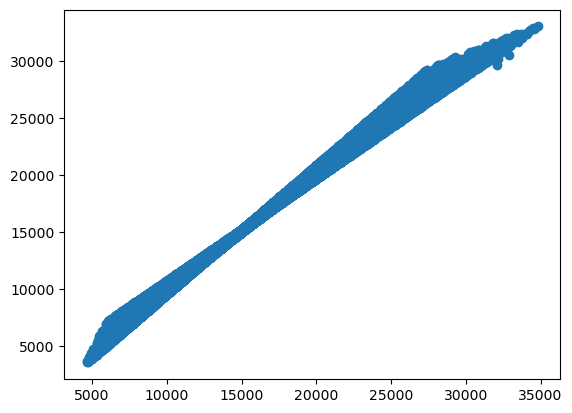

In [65]:
# plot b/w actual and the predicted value of the y varibale(mpg)
plt.scatter(y_train,predicted_train);

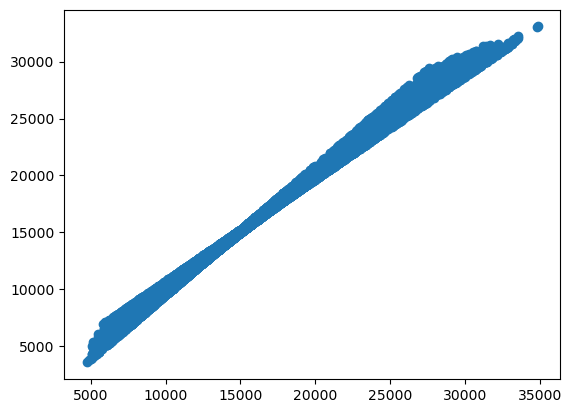

In [66]:
plt.scatter(y_test,predicted_test);

In [67]:
# Linear Regression using stats model

In [68]:
# Concat X and Y 
data_train=pd.concat([x_train,y_train],axis=1)
data_test=pd.concat([x_test,y_test],axis=1)

In [69]:
data_train.head()

,Fan,Monitor,AirConditioner,Television,Refrigerator,Month,City,Company,Number of units consumed per month,Total Appliances,Electricity Cost per Unit,ElectricityBill
43423,0.001701,6,0,1.476277,0,10,12,26,-0.947694,0.649251,1.265806,11378.64
37073,0.184491,6,1,1.302543,0,10,14,9,-0.359177,0.750184,-1.160598,12400.08
36709,1.464022,5,1,0.955076,0,12,12,20,-0.013913,1.153917,1.265806,16576.56
17822,-1.095040,5,3,-1.129725,0,8,0,6,0.025322,-1.268479,-0.813969,14580.24
13496,0.367281,6,1,0.086409,0,2,0,11,-0.437646,0.144585,-0.813969,12342.96


In [70]:
data_train.rename(columns={'Number of units consumed per month':'Number_of_units_consumed_per_month',
                          'Total Appliances':'Total_Appliances','Electricity Cost per Unit':'Electricity_Cost_per_Unit'},inplace=True)

In [71]:
data_test.rename(columns={'Number of units consumed per month':'Number_of_units_consumed_per_month',
                          'Total Appliances':'Total_Appliances','Electricity Cost per Unit':'Electricity_Cost_per_Unit'},inplace=True)

In [72]:
data_test.head()

,Fan,Monitor,AirConditioner,Television,Refrigerator,Month,City,Company,Number_of_units_consumed_per_month,Total_Appliances,Electricity_Cost_per_Unit,ElectricityBill
45258,0.367281,5,1,-0.782258,0,12,3,10,-0.563196,-0.461014,-0.467340,12033.36
22057,1.281232,6,1,1.302543,0,3,7,18,-0.006066,1.355783,1.439121,16802.88
21931,-1.460620,6,0,0.086409,0,11,8,9,-1.575446,-0.965679,0.919177,7710.96
43867,-1.460620,0,1,-0.955992,0,9,3,9,-1.308652,-2.075944,-0.467340,8339.76
36030,0.915652,6,2,0.955076,0,7,5,29,0.386279,1.052983,0.052604,17357.76


In [73]:
import statsmodels.formula.api as smf

In [74]:
expr='ElectricityBill ~ Fan+Monitor+AirConditioner+Television+Refrigerator+Month+City+Company+Number_of_units_consumed_per_month+Total_Appliances+Electricity_Cost_per_Unit'

In [75]:
lm1=smf.ols(formula=expr,data=data_train).fit()

In [76]:
# Fstat: H0: All the coeff are 0
# Ha: All the coeff are not 0 atleast for one of the Ind varibales
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        ElectricityBill   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 6.326e+05
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:43:29   Log-Likelihood:            -2.3158e+05
No. Observations:               31741   AIC:                         4.632e+05
Df Residuals:                   31729   BIC:                         4.633e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [77]:
# p_value interpretation
# H0: There is no relationship b/w the variable and the dependent varibale 
# Ha: There is relationship b/w the variable and the dependent varibale

In [78]:
lm1.rsquared

0.9954610872928213

In [79]:
lm1.params

Intercept                             15648.612452
Fan                                   -3046.197619
Monitor                                -718.491680
AirConditioner                         1983.004918
Television                            -4370.462711
Refrigerator                            292.791309
Month                                    -0.150878
City                                     -0.628266
Company                                   0.054302
Number_of_units_consumed_per_month      -56.869648
Total_Appliances                       8531.474363
Electricity_Cost_per_Unit              1054.478543
dtype: float64

In [80]:
# MSE on train
mean_squared_error(lm1.predict(data_train.drop('ElectricityBill',axis=1)),data_train['ElectricityBill'])

127297.87985363857

In [81]:
# RMSE on Train
mean_squared_error(lm1.predict(data_train.drop('ElectricityBill',axis=1)),data_train['ElectricityBill'],squared=False)

356.78828435591686

In [82]:
# MSE on Test 
mean_squared_error(lm1.predict(data_test.drop('ElectricityBill',axis=1)),data_test['ElectricityBill'])

131493.7116906693

In [83]:
# RMSE on Test
mean_squared_error(lm1.predict(data_test.drop('ElectricityBill',axis=1)),data_test['ElectricityBill'],squared=False)

362.6206167479578

In [140]:
# Predicting a new record
values=np.array([5,7,2,4,2,5,8,6,1700,15,6.5])

In [141]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [142]:
LR.predict(values.reshape(1,-1))

array([[20600.2937615]])

## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
dt_model= DecisionTreeRegressor(max_depth=3)

In [86]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [87]:
dt_model.score(x_train,y_train)

0.9321754035147669

In [88]:
dt_model.score(x_test,y_test)

0.931956724111286

In [89]:
## RMSE on train data
predicted_train=dt_model.predict(x_train)
mean_squared_error(y_train,predicted_train,squared=False)

1379.2032738661733

In [90]:
## RMSE on test data
predicted_test=dt_model.predict(x_test)
mean_squared_error(y_test,predicted_test,squared=False)

1394.2729894347651

In [91]:
mean_absolute_percentage_error(y_train,predicted_train)

0.07611738400855644

## Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
rf_model=RandomForestRegressor(n_estimators=100,
                              random_state=4,
                              max_samples=0.7,
                              max_features=0.75,
                              max_depth=35)

In [94]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=35, max_features=0.75, max_samples=0.7,
                      random_state=4)

In [95]:
rf_model.score(x_train,y_train)

0.9999809740853169

In [96]:
rf_model.score(x_test,y_test)

0.9999247558470752

In [97]:
## RMSE on train data
predicted_train=rf_model.predict(x_train)
mean_squared_error(y_train,predicted_train,squared=False)

23.0997586597513

In [98]:
## RMSE on test data
predicted_test=rf_model.predict(x_test)
mean_squared_error(y_test,predicted_test,squared=False)

46.365141089057246

In [99]:
mean_absolute_percentage_error(y_train,predicted_train)

0.0006517427124466778

### By The all models we can gathered accuracy of R2 score, RMSE and MAE Score and we can make the dataframe to easily identify which module gives best accuracy.

In [100]:
Results = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest'],'Train Score':[0.99,0.93,0.99],'Test Score':[0.99,0.93,0.99],'RMSE Score':[356,1379,23],'MAE Score':[0.01,0.07,0.004]})
Results_show = Results.set_index('Model')
Results_show

,Train Score,Test Score,RMSE Score,MAE Score
Model,,,,
Linear Regression,0.99,0.99,356,0.010
Decision Tree,0.93,0.93,1379,0.070
Random Forest,0.99,0.99,23,0.004


## Conclusion

#### In conclusion, the Random Forest model performs the best among the three models, as it achieves the highest test score, the lowest RMSE score, and the lowest MAE score. It demonstrates strong predictive accuracy and generalization ability compared to Linear Regression and Decision Tree.

By deploying electricity bill prediction models on a website, businesses can harness these advantages to improve financial planning, optimize costs, enhance operational performance, promote sustainability, engage customers, and make data-driven decisions to drive success in their energy management strategies.


Linear regression models can provide insights into customer behavior and its influence on electricity bills. By analyzing customer data and identifying patterns, businesses can develop targeted marketing or educational campaigns to encourage energy-saving behaviors among their customers.



In this dataset, we have important electrical appliances power consumption data. From a business perspective, we can conduct surveys or gather data on the power consumption of other electrical equipment within companies. By incorporating this additional data, we can improve the accuracy of predicting the exact electricity bill for companies.


Equipment Upgrades and Maintenance: Regularly maintain and service equipment, machinery, and electrical systems to ensure they operate at peak efficiency. Consider upgrading to energy-efficient appliances, such as refrigerators and air conditioning units, to reduce energy consumption.

Equipment Upgrades and Maintenance: Regularly maintain and service equipment, machinery, and electrical systems to ensure they operate at peak efficiency. Consider upgrading to energy-efficient appliances, such as refrigerators and air conditioning units, to reduce energy consumption.

Continuous Improvement and Monitoring: Regularly review and reassess energy consumption patterns, track progress, and identify further opportunities for energy savings. Energy efficiency should be an ongoing process, and continuous monitoring and improvement are crucial for long-term cost reduction.

Explore the possibility of integrating air conditioners and refrigerators with a smart grid system. This allows for better energy management by optimizing their usage based on demand and grid conditions. Smart grid technologies can enable load balancing and demand response mechanisms to reduce energy consumption during peak hours.